<a href="https://colab.research.google.com/github/Sarah-Shitrit/FashionMNIST/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and downloads

In [15]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [16]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Networks

## LENET-5 with wd

In [ ]:
# Build network, LENET-5
class LENET5(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Conv2d(1, 6, 5, padding='same')
    self.fc2 = nn.MaxPool2d(2, stride=2)
    self.fc3 = nn.Conv2d(6, 16, 5)
    self.fc4 = nn.MaxPool2d(2, stride=2)
    self.fc5 = nn.Conv2d(16, 120, 5)
    self.fc6 = nn.Linear(120, 84)
    self.fc7 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc6(x))
    x = F.log_softmax(self.fc7(x), dim=1) 

    return x



In [ ]:
# weight decay
model = LENET5()
criterion = nn.NLLLoss()
optimizer_wd = optim.Adam(model.parameters(), lr=0.03, weight_decay=0.05)

## LENET-5 with dropout

In [17]:
# LENET-5 with dropout
class LENET5_dropout(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Conv2d(1, 6, 5, padding='same')
    self.fc2 = nn.MaxPool2d(2, stride=2)
    self.fc3 = nn.Conv2d(6, 16, 5)
    self.fc4 = nn.MaxPool2d(2, stride=2)
    self.fc5 = nn.Conv2d(16, 120, 5)
    self.fc6 = nn.Linear(120, 84)
    self.fc7 = nn.Linear(84, 10)

    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.relu(self.fc3(x))
    x = self.dropout(x)
    x = F.relu(self.fc4(x))
    x = self.dropout(x)
    x = F.relu(self.fc5(x))
    x = self.dropout(x)
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc6(x))
    x = F.log_softmax(self.fc7(x), dim=1) 

    return x

In [ ]:
# Additional network parameters
model = LENET5_dropout()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

## LENET-5 with BN

In [14]:
print(len(testloader))

print(len(testloader.dataset))
print(len(testloader.dataset)/len(trainloader))
print(len(testloader.dataset)/64)

157
10000
10.660980810234541
156.25


In [ ]:
# LENET-5, BN
class LENET5_bn(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Conv2d(1, 6, 5, padding='same')
    self.fc1_bn = nn.BatchNorm2d(6)

    self.fc2 = nn.MaxPool2d(2, stride=2)
    self.fc2_bn = nn.BatchNorm2d(6)

    self.fc3 = nn.Conv2d(6, 16, 5)
    self.fc3_bn = nn.BatchNorm2d(16)

    self.fc4 = nn.MaxPool2d(2, stride=2)
    self.fc4_bn = nn.BatchNorm2d(16)
    
    self.fc5 = nn.Conv2d(16, 120, 5)
    self.fc5_bn = nn.BatchNorm2d(120)
    
    self.fc6 = nn.Linear(120, 84)
    self.fc6_bn = nn.BatchNorm2d(84)
    
    self.fc7 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(self.fc1_bn(x))
    x = self.fc2(x)
    x = F.relu(self.fc2_bn(x))
    x = self.fc3(x)
    x = F.relu(self.fc3_bn(x))
    x = self.fc4(x)
    x = F.relu(self.fc4_bn(x))
    x = self.fc5(x)
    x = F.relu(self.fc5_bn(x))
    x = x.view(x.shape[0], -1)
    x = self.fc6(x)
    x = F.relu(self.fc6_bn(x))
    x = F.log_softmax(self.fc7(x), dim=1) 

    return x

In [ ]:
# Additional network parameters
model = LENET5()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

# Train

In [ ]:
# Train network 

"""
model = LENET5()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.05)

"""
# Train network - dropout
model = LENET5_dropout()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
"""
# Train network - bn
model = LENET5_bn()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
"""

epochs = 30

#train_losses_wd, test_losses_wd = [], []
train_losses_dropout, test_losses_dropout = [], []
accuracy_train_dropout, accuracy_test_dropout = [], []
#train_losses_bn, test_losses_bn = [], []

for e in range(epochs):
  running_loss = 0
  accuracy_train = 0
  for images, labels in trainloader:
    
    optimizer.zero_grad()

    log_ps = model(images)
    loss = criterion(log_ps, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
    ps = torch.exp(log_ps)
    top_p, top_class = ps.topk(1, dim=1)
    equals = top_class == labels.view(*top_class.shape)
    accuracy_train += torch.mean(equals.type(torch.FloatTensor))


  else:
    test_loss = 0
    accuracy_test = 0
    counter = 0

    with torch.no_grad():
      model.eval()
      for images, labels in testloader:
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy_test += torch.mean(equals.type(torch.FloatTensor))

    model.train()

    train_losses_dropout.append(running_loss/len(trainloader))
    test_losses_dropout.append(test_loss/len(testloader))
    accuracy_train_dropout.append(accuracy_train / len(trainloader))
    accuracy_test_dropout.append(accuracy_test / len(testloader))
    """
    train_losses_droput.append(train_loss)
    test_losses_dropout.append(test_loss)
    train_losses_bn.append(train_loss)
    test_losses_bn.append(test_loss)
    """

    print ("Epoch: {}/{}..".format(e+1, epochs),
           "Training loss: {:.3f}..".format(train_losses_dropout[-1]),
           "Test loss: {:.3f}..".format(test_losses_dropout[-1]),
           "Train Accuracy: {:.3f}".format(accuracy_train / len(trainloader)),
           "Test Accuracy: {:.3f}..".format(accuracy_test / len(testloader)))
           

Epoch: 1/30.. Training loss: 0.678.. Test loss: 0.505.. Train Accuracy: 0.742 Test Accuracy: 0.830..
Epoch: 2/30.. Training loss: 0.466.. Test loss: 0.459.. Train Accuracy: 0.828 Test Accuracy: 0.851..
Epoch: 3/30.. Training loss: 0.420.. Test loss: 0.390.. Train Accuracy: 0.845 Test Accuracy: 0.869..
Epoch: 4/30.. Training loss: 0.391.. Test loss: 0.382.. Train Accuracy: 0.855 Test Accuracy: 0.875..
Epoch: 5/30.. Training loss: 0.373.. Test loss: 0.360.. Train Accuracy: 0.861 Test Accuracy: 0.877..
Epoch: 6/30.. Training loss: 0.357.. Test loss: 0.335.. Train Accuracy: 0.866 Test Accuracy: 0.882..
Epoch: 7/30.. Training loss: 0.349.. Test loss: 0.336.. Train Accuracy: 0.870 Test Accuracy: 0.884..
Epoch: 8/30.. Training loss: 0.339.. Test loss: 0.324.. Train Accuracy: 0.874 Test Accuracy: 0.889..
Epoch: 9/30.. Training loss: 0.333.. Test loss: 0.313.. Train Accuracy: 0.876 Test Accuracy: 0.888..
Epoch: 10/30.. Training loss: 0.325.. Test loss: 0.302.. Train Accuracy: 0.879 Test Accurac

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

In [ ]:
print(accuracy_train)

tensor(841.8906)


In [ ]:
plt.plot(accuracy_train_dropout, label='Training accuracy')
plt.plot(accuracy_test_dropout, label='Validation accuracy')
plt.legend(frameon=False)
plt.title('LENET-5 with Dropout')

In [ ]:
# Save model parameters
torch.save(model.state_dict(), '/content/drive/MyDrive/Deep Learning Course/HW1/lenet5_dropout.pth')
torch.save((accuracy_train_dropout, accuracy_test_dropout), '/content/drive/MyDrive/Deep Learning Course/HW1/accuracies_dropout.pth')

In [10]:
# Load model parameters
model = LENET5_dropout()
state_dict = torch.load('/content/drive/MyDrive/Deep Learning Course/HW1/lenet5_dropout.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
check = torch.load('/content/drive/MyDrive/Deep Learning Course/HW1/lenet5_dropout.pth')

print(model1)

In [ ]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

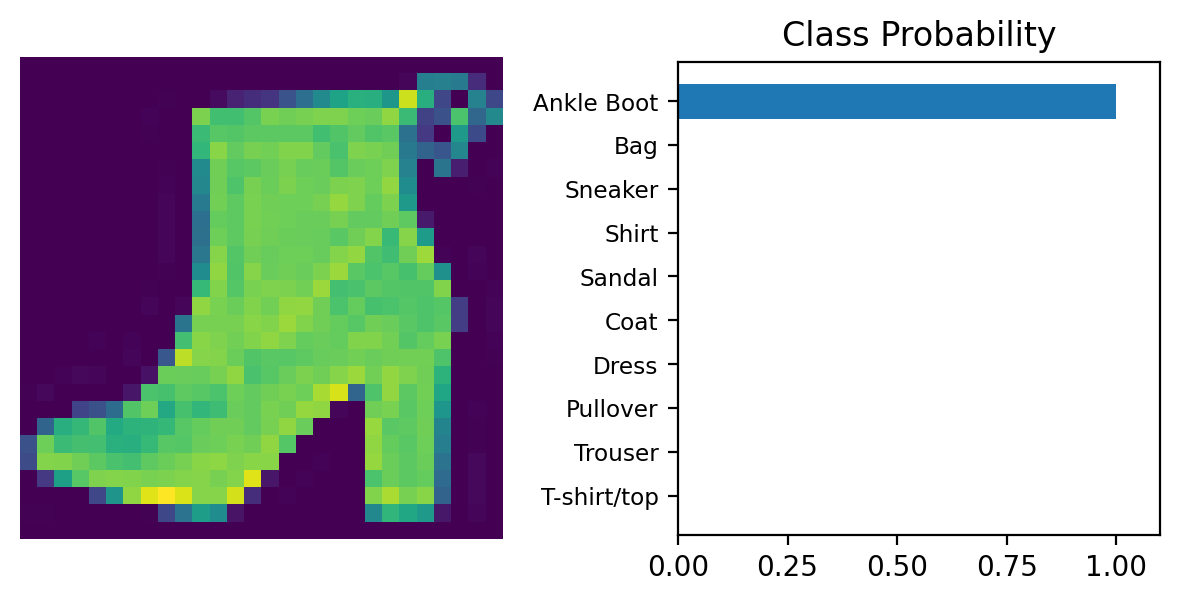

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
#img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img.view(1, 1, 28, 28)))

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

<p>Compare the usage of the following techniques with Lenet5: </p>
<ul>
<li>Dropout (at the hidden layer)</li>
<li>Weight Decay (also known as #2 loss)</li>
<li>Batch Normalization</li>
</ul> 


# Plots